# **Data Loading and EDA**

In [1]:
import pandas as pd

In [2]:
import warnings
# Suppress FutureWarnings
warnings.simplefilter(action='ignore', category=FutureWarning)

# 1. Crop Land Nutrient Balance

In [3]:
Crop_Land_Nutrient_Balance_df= pd.read_csv("Crop_Land_Nutrient_Balance.csv")
Crop_Land_Nutrient_Balance_df.drop(['Domain','Domain Code', 'Area Code (M49)', 'Element Code','Item Code', 'Year Code', 'Note'], axis=1,inplace=True)
Crop_Land_Nutrient_Balance_df.rename(columns={'Element': 'Nutrients', 'Item': 'Nutrients_type', 'Value': 'Nutrients_Value',  'Unit': 'Nutrients_Unit', 'Flag': 'Nutrients_Flag', 'Flag Description': 'Nutrients_Flag_Description'}, inplace=True)
Crop_Land_Nutrient_Balance_df = Crop_Land_Nutrient_Balance_df[Crop_Land_Nutrient_Balance_df['Nutrients'].isin(['Cropland nitrogen', 'Cropland phosphorus', 'Cropland potassium'])]
Crop_Land_Nutrient_Balance_df = Crop_Land_Nutrient_Balance_df[Crop_Land_Nutrient_Balance_df['Year'].between(2000, 2008)]
# print(Crop_Land_Nutrient_Balance_df['Nutrients'].unique())
Crop_Land_Nutrient_Balance_df.head()

,Area,Nutrients,Nutrients_type,Year,Nutrients_Unit,Nutrients_Value,Nutrients_Flag,Nutrients_Flag_Description
234,Bangladesh,Cropland nitrogen,Mineral fertilizers,2000,t,995826.000,E,Estimated value
236,Bangladesh,Cropland phosphorus,Mineral fertilizers,2000,t,109140.828,E,Estimated value
238,Bangladesh,Cropland potassium,Mineral fertilizers,2000,t,90055.000,E,Estimated value
240,Bangladesh,Cropland nitrogen,Mineral fertilizers,2001,t,1058172.500,E,Estimated value
242,Bangladesh,Cropland phosphorus,Mineral fertilizers,2001,t,111919.238,E,Estimated value


In [4]:
print(Crop_Land_Nutrient_Balance_df['Nutrients_Unit'].unique())

['t']


## **Imputing Missing Values**

In [5]:
null_values_count = Crop_Land_Nutrient_Balance_df.isnull().sum()
print(null_values_count)

Area                            0
Nutrients                       0
Nutrients_type                  0
Year                            0
Nutrients_Unit                  0
Nutrients_Value               405
Nutrients_Flag                  0
Nutrients_Flag_Description      0
dtype: int64


In [6]:
total_rows = len(Crop_Land_Nutrient_Balance_df)
null_percentage = (Crop_Land_Nutrient_Balance_df.isnull().sum() / total_rows) * 100
print(null_percentage)

Area                           0.0
Nutrients                      0.0
Nutrients_type                 0.0
Year                           0.0
Nutrients_Unit                 0.0
Nutrients_Value               37.5
Nutrients_Flag                 0.0
Nutrients_Flag_Description     0.0
dtype: float64


In [7]:
# Summary statistics before imputation
before_imputation_stats = Crop_Land_Nutrient_Balance_df['Nutrients_Value'].describe()

In [8]:
# Calculate the mean of the 'Nutrients_Value' column
mean_value = Crop_Land_Nutrient_Balance_df['Nutrients_Value'].mean()

# Replace missing values with the mean
Crop_Land_Nutrient_Balance_df['Nutrients_Value'].fillna(mean_value, inplace=True)

In [9]:
# Summary statistics after imputation
after_imputation_stats = Crop_Land_Nutrient_Balance_df['Nutrients_Value'].describe()

In [10]:
print("Summary Statistics Before Imputation:\n", before_imputation_stats)
print("\nSummary Statistics After Imputation:\n", after_imputation_stats)

Summary Statistics Before Imputation:
 count    6.750000e+02
mean     1.946534e+06
std      3.776784e+06
min      2.273654e+02
25%      1.545536e+05
50%      3.905750e+05
75%      2.242606e+06
max      2.884858e+07
Name: Nutrients_Value, dtype: float64

Summary Statistics After Imputation:
 count    1.080000e+03
mean     1.946534e+06
std      2.984979e+06
min      2.273654e+02
25%      2.753633e+05
50%      1.946534e+06
75%      1.946534e+06
max      2.884858e+07
Name: Nutrients_Value, dtype: float64


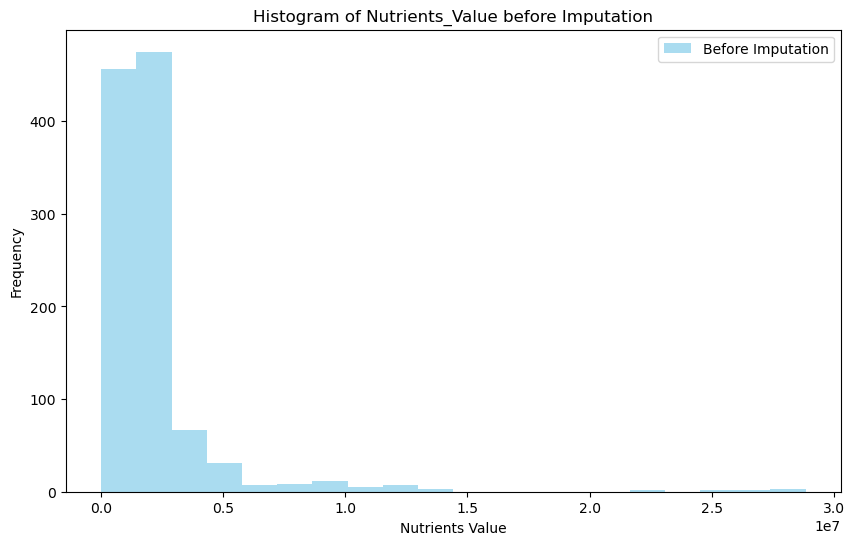

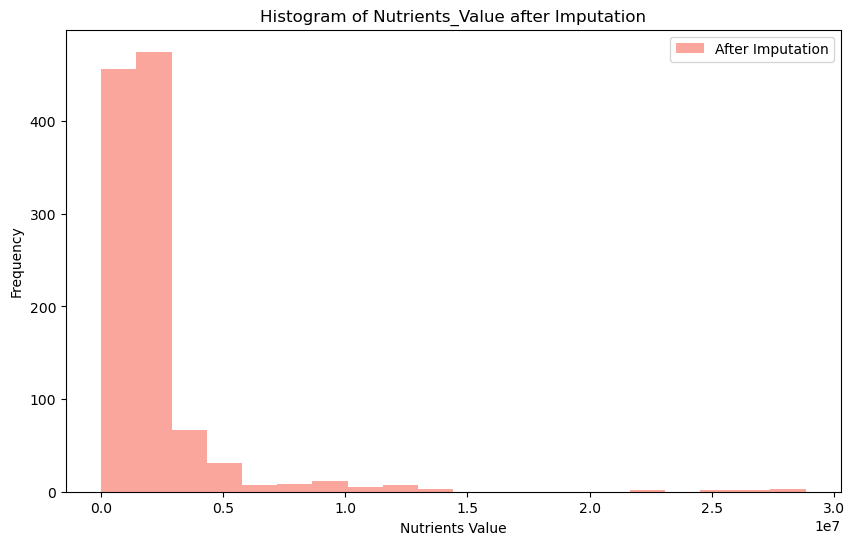

In [11]:
import matplotlib.pyplot as plt

# Histogram before imputation
plt.figure(figsize=(10, 6))
plt.hist(Crop_Land_Nutrient_Balance_df['Nutrients_Value'], bins=20, color='skyblue', alpha=0.7, label='Before Imputation')
plt.xlabel('Nutrients Value')
plt.ylabel('Frequency')
plt.title('Histogram of Nutrients_Value before Imputation')
plt.legend()
plt.show()

# Histogram after imputation
plt.figure(figsize=(10, 6))
plt.hist(Crop_Land_Nutrient_Balance_df['Nutrients_Value'], bins=20, color='salmon', alpha=0.7, label='After Imputation')
plt.xlabel('Nutrients Value')
plt.ylabel('Frequency')
plt.title('Histogram of Nutrients_Value after Imputation')
plt.legend()
plt.show()

/Users/talentsearch/anaconda3/lib/python3.9/site-packages/scipy/__init__.py:146: UserWarning: A NumPy version >=1.16.5 and <1.23.0 is required for this version of SciPy (detected version 1.26.2
  warnings.warn(f"A NumPy version >={np_minversion} and <{np_maxversion}"


Text(0.5, 1.0, 'Distribution of Nutrients')

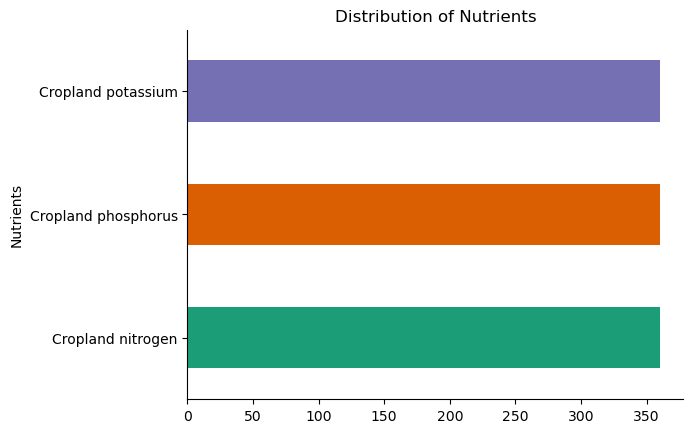

In [12]:
# @title Nutrients
from matplotlib import pyplot as plt
import seaborn as sns
Crop_Land_Nutrient_Balance_df.groupby('Nutrients').size().plot(kind='barh', color=sns.palettes.mpl_palette('Dark2'))
plt.gca().spines[['top', 'right',]].set_visible(False)
plt.title("Distribution of Nutrients")

<Figure size 1000x600 with 0 Axes>

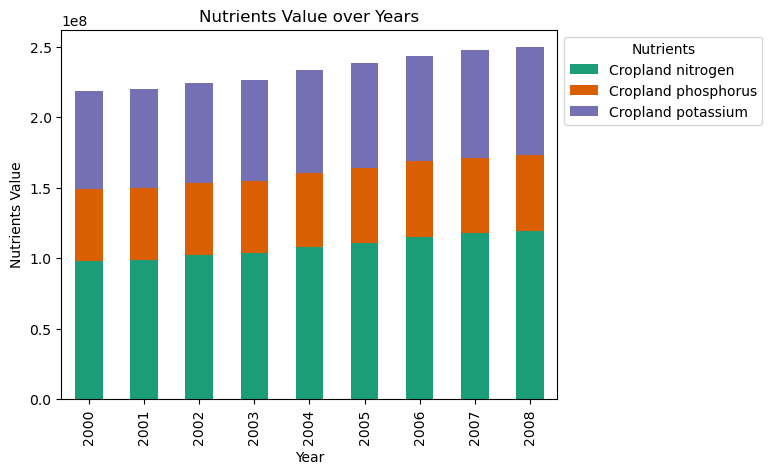

In [55]:
# Importing necessary libraries
from matplotlib import pyplot as plt
import seaborn as sns

# Grouping the data by year and nutrients and summing the values
df_grouped = Crop_Land_Nutrient_Balance_df.groupby(['Year', 'Nutrients'])['Nutrients_Value'].sum().unstack()

# Plotting the stacked bar graph
plt.figure(figsize=(10, 6))
sns.set_palette("Dark2")
df_grouped.plot(kind='bar', stacked=True)
plt.xlabel('Year')
plt.ylabel('Nutrients Value')
plt.title('Nutrients Value over Years')
plt.legend(title='Nutrients', bbox_to_anchor=(1, 1), loc='upper left')
plt.show()

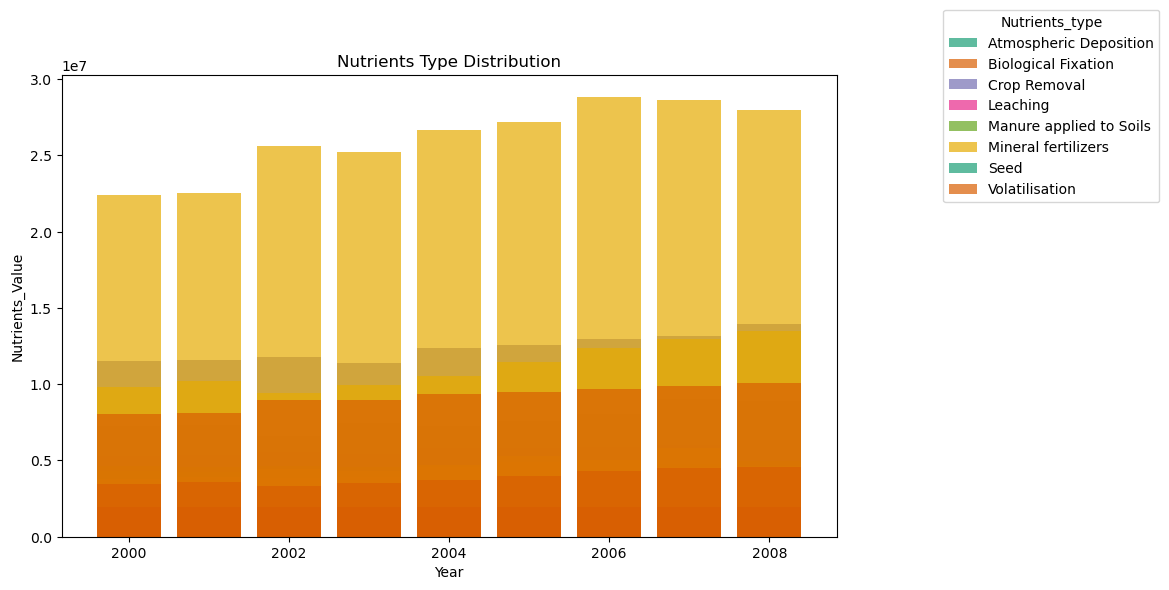

In [14]:
from matplotlib import pyplot as plt
import seaborn as sns

# Function to plot each series
def _plot_series(series, series_name, series_index=0):
    palette = list(sns.palettes.mpl_palette('Dark2'))
    xs = series['Year']
    ys = series['Nutrients_Value']
    plt.bar(xs, ys, label=series_name, color=palette[series_index % len(palette)], alpha=0.7)

# Create figure and axis objects
fig, ax = plt.subplots(figsize=(10, 6))

# Sort DataFrame by 'Year' column
df_sorted = Crop_Land_Nutrient_Balance_df.sort_values('Year', ascending=True)

# Iterate over each series grouped by 'Nutrients_type' and plot
for i, (series_name, series) in enumerate(df_sorted.groupby('Nutrients_type')):
    _plot_series(series, series_name, i)

# Set legend and axis labels
fig.legend(title='Nutrients_type', bbox_to_anchor=(1, 1), loc='upper left')
plt.xlabel('Year')
plt.ylabel('Nutrients_Value')
plt.title("Nutrients Type Distribution")
# Show plot
plt.show()

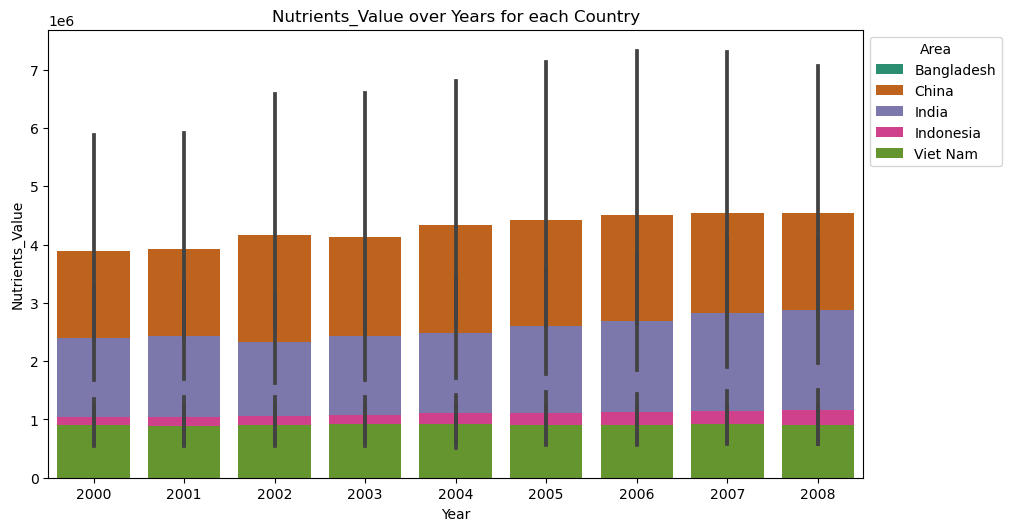

In [56]:
# Function to plot stacked bar graph for each series
def _plot_series(series, series_name, series_index=0):
    palette = list(sns.palettes.mpl_palette('Dark2'))
    xs = series['Year']
    ys = series['Nutrients_Value']

    # Use seaborn's barplot to create stacked bars
    sns.barplot(x=xs, y=ys, label=series_name, color=palette[series_index % len(palette)], ax=ax)

fig, ax = plt.subplots(figsize=(10, 5.2), constrained_layout=True)  # Use constrained_layout for better layout
df_sorted = Crop_Land_Nutrient_Balance_df.sort_values('Year', ascending=True)
for i, (series_name, series) in enumerate(df_sorted.groupby('Area')):
    _plot_series(series, series_name, i)

# Set labels and legend
plt.xlabel('Year')
plt.ylabel('Nutrients_Value')
plt.legend(title='Area', bbox_to_anchor=(1, 1), loc='upper left')
plt.title("Nutrients_Value over Years for each Country")
plt.show()

# 2. Crop Production

In [16]:
Crop_Production_df= pd.read_csv("Crop_Production.csv")
Crop_Production_df.drop(['Domain','Domain Code', 'Area Code (M49)', 'Element Code','Item Code (CPC)', 'Year Code' , 'Note'], axis=1,inplace=True)
Crop_Production_df.rename(columns={'Element': 'Prod_type', 'Value': 'Prod_Value', 'Item': 'Crop_Name', 'Value': 'Crop_Production_Value',  'Unit': 'Crop_Production_Unit', 'Flag': 'Crop_Production_Flag', 'Flag Description': 'Crop_Production_Flag_Description'}, inplace=True)
Crop_Production_df = Crop_Production_df[Crop_Production_df['Year'].between(2000, 2008)]
# Crop_Production_df = Crop_Land_Nutrient_Balance_df[Crop_Land_Nutrient_Balance_df['Nutrients'].isin(['Cropland nitrogen', 'Cropland phosphorus', 'Cropland potassium'])]
# print(Crop_Land_Nutrient_Balance_df['Nutrients'].unique())
Crop_Production_df.head()

,Area,Prod_type,Crop_Name,Year,Crop_Production_Unit,Crop_Production_Value,Crop_Production_Flag,Crop_Production_Flag_Description
117,Bangladesh,Area harvested,Barley,2000,ha,6880.0,A,Official figure
118,Bangladesh,Yield,Barley,2000,100 g/ha,7267.0,A,Official figure
119,Bangladesh,Production,Barley,2000,t,5000.0,A,Official figure
120,Bangladesh,Area harvested,Barley,2001,ha,5668.0,A,Official figure
121,Bangladesh,Yield,Barley,2001,100 g/ha,7057.0,A,Official figure


In [17]:
print(Crop_Production_df['Crop_Production_Unit'].unique())

['ha' '100 g/ha' 't']


In [18]:
# Define conversion factor from grams to metric tons
grams_to_metric_tons = 1e-4  # Conversion factor from grams to metric tons

# Convert yield from grams per hectare to metric tons per hectare
Crop_Production_df.loc[Crop_Production_df['Crop_Production_Unit'] == '100 g/ha', 'Crop_Production_Value'] *= grams_to_metric_tons

# Update the unit in 'Crop_Production_Unit' column to match the converted unit
Crop_Production_df.loc[Crop_Production_df['Crop_Production_Unit'] == '100 g/ha', 'Crop_Production_Unit'] = 't/ha'

# Display the DataFrame with updated units
Crop_Production_df.head()

,Area,Prod_type,Crop_Name,Year,Crop_Production_Unit,Crop_Production_Value,Crop_Production_Flag,Crop_Production_Flag_Description
117,Bangladesh,Area harvested,Barley,2000,ha,6880.0000,A,Official figure
118,Bangladesh,Yield,Barley,2000,t/ha,0.7267,A,Official figure
119,Bangladesh,Production,Barley,2000,t,5000.0000,A,Official figure
120,Bangladesh,Area harvested,Barley,2001,ha,5668.0000,A,Official figure
121,Bangladesh,Yield,Barley,2001,t/ha,0.7057,A,Official figure


Text(0.5, 1.0, 'Crop Production Size by Crop')

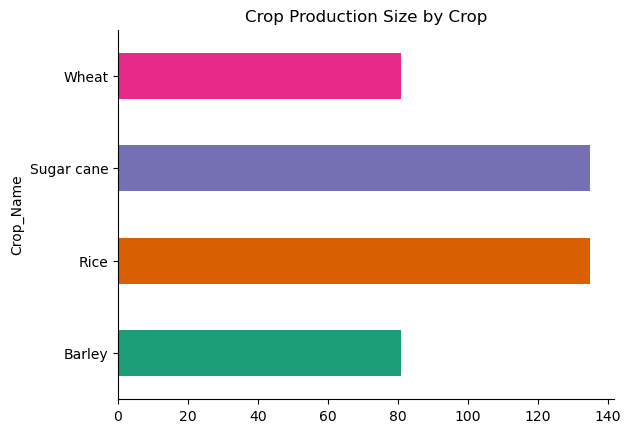

In [19]:
from matplotlib import pyplot as plt
import seaborn as sns
Crop_Production_df.groupby('Crop_Name').size().plot(kind='barh', color=sns.palettes.mpl_palette('Dark2'))
plt.gca().spines[['top', 'right',]].set_visible(False)
plt.title("Crop Production Size by Crop")

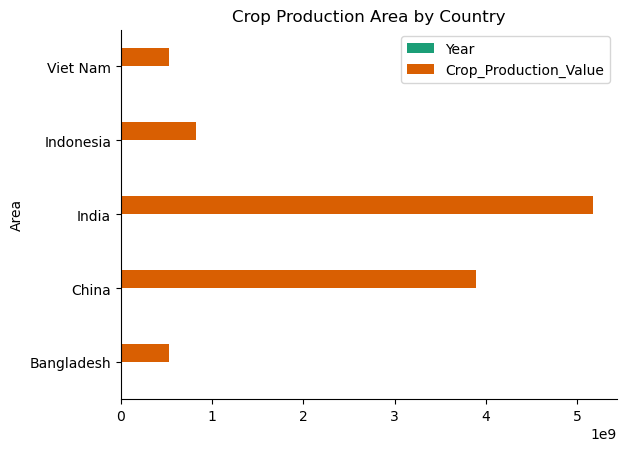

In [20]:
from matplotlib import pyplot as plt
import seaborn as sns

# Group by 'Area' and get the size of each group, then plot as horizontal bar chart
Crop_Production_df.groupby('Area').sum().plot(kind='barh', color=sns.color_palette('Dark2'))

# Hide the top and right spines of the plot
plt.gca().spines['top'].set_visible(False)
plt.gca().spines['right'].set_visible(False)
plt.title("Crop Production Area by Country")
# Show the plot
plt.show()

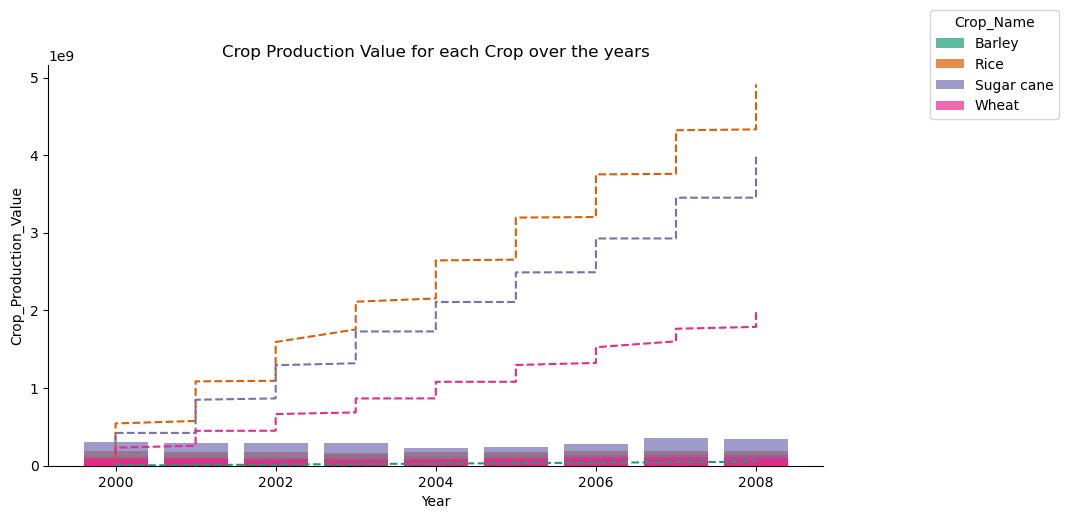

In [21]:
from matplotlib import pyplot as plt
import seaborn as sns

# Function to plot stacked bar for each crop
def _plot_series(series, series_name, series_index=0):
    palette = list(sns.palettes.mpl_palette('Dark2'))
    xs = series['Year']
    ys = series['Crop_Production_Value']
    cumulative_ys = ys.cumsum()

    plt.bar(xs, ys, label=series_name, color=palette[series_index % len(palette)], alpha=0.7)
    plt.plot(xs, cumulative_ys, color=palette[series_index % len(palette)], linestyle='--')

# Create the figure and axis objects
fig, ax = plt.subplots(figsize=(10, 5.2))

# Sort the DataFrame by year
df_sorted = Crop_Production_df.sort_values('Year', ascending=True)

# Iterate over each crop and plot its stacked bar
for i, (series_name, series) in enumerate(df_sorted.groupby('Crop_Name')):
    _plot_series(series, series_name, i)

# Add legend outside the plot
fig.legend(title='Crop_Name', bbox_to_anchor=(1, 1), loc='upper left')

# Customize labels and remove spines
plt.xlabel('Year')
plt.ylabel('Crop_Production_Value')
sns.despine(fig=fig, ax=ax)
plt.title("Crop Production Value for each Crop over the years")
plt.show()

# 3. Temperature Change on Land

In [22]:
Temperature_Change_On_Land_df= pd.read_csv("Temperature_Change_On_Land.csv")
Temperature_Change_On_Land_df.drop(['Domain','Domain Code', 'Area Code (M49)', 'Element Code', 'Months Code', 'Year Code'],  axis=1,inplace=True)
Temperature_Change_On_Land_df.rename(columns={'Element': 'Temp_Change', 'Value': 'TMP_Value',  'Unit': 'TMP_Unit', 'Flag': 'TMP_Flag', 'Flag Description': 'TMP_Description'}, inplace=True)
Temperature_Change_On_Land_df = Temperature_Change_On_Land_df[Temperature_Change_On_Land_df['Year'].between(2000, 2008)]
Temperature_Change_On_Land_df = Temperature_Change_On_Land_df[Temperature_Change_On_Land_df['Months'].isin(['January','February','March' ,'April' ,'May' ,'June','July','August','September','October','November','December'])]
# print(Temperature_Change_On_Land_df['Months'].unique())
Temperature_Change_On_Land_df.head()

,Area,Temp_Change,Months,Year,TMP_Unit,TMP_Value,TMP_Flag,TMP_Description
39,Bangladesh,Temperature change,January,2000,°c,0.532,E,Estimated value
40,Bangladesh,Temperature change,January,2001,°c,-0.388,E,Estimated value
41,Bangladesh,Temperature change,January,2002,°c,0.832,E,Estimated value
42,Bangladesh,Temperature change,January,2003,°c,-1.236,E,Estimated value
43,Bangladesh,Temperature change,January,2004,°c,-0.055,E,Estimated value


In [23]:
print(Temperature_Change_On_Land_df['TMP_Unit'].unique())

['°c']


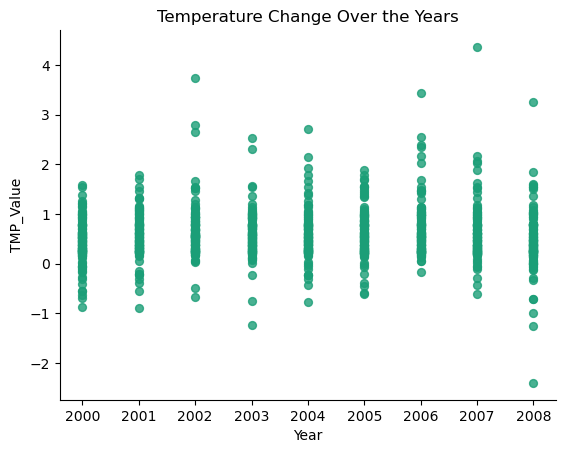

In [24]:
from matplotlib import pyplot as plt
Temperature_Change_On_Land_df.plot(kind='scatter', x='Year', y='TMP_Value', s=32, alpha=.8)
plt.title('Temperature Change Over the Years')
plt.gca().spines[['top', 'right',]].set_visible(False)

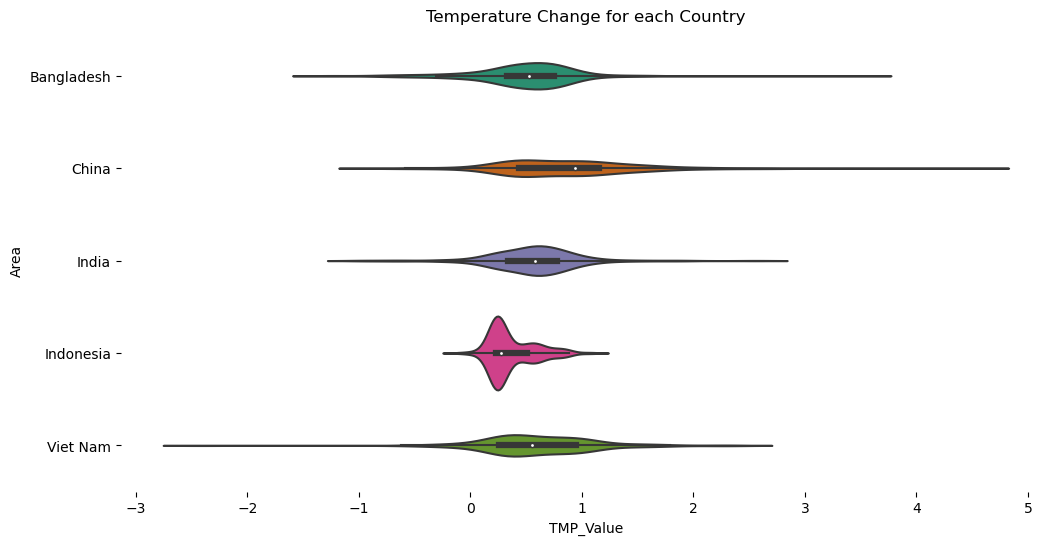

In [25]:
from matplotlib import pyplot as plt
import seaborn as sns
figsize = (12, 1.2 * len(Temperature_Change_On_Land_df['Area'].unique()))
plt.figure(figsize=figsize)
plt.title('Temperature Change for each Country')
sns.violinplot(Temperature_Change_On_Land_df, x='TMP_Value', y='Area', inner='box', palette='Dark2')
sns.despine(top=True, right=True, bottom=True, left=True)

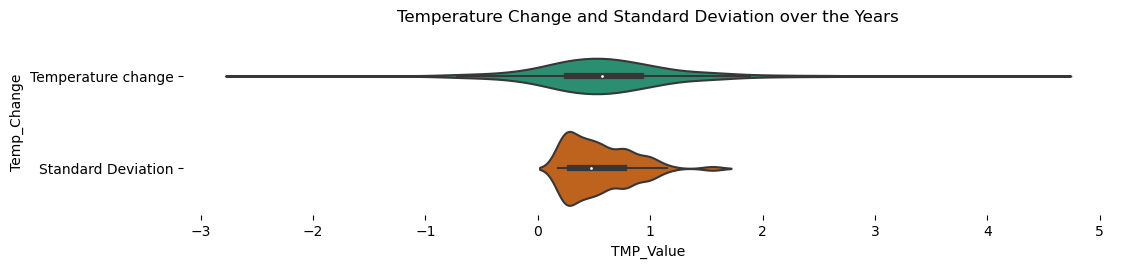

In [26]:
from matplotlib import pyplot as plt
import seaborn as sns
figsize = (12, 1.2 * len(Temperature_Change_On_Land_df['Temp_Change'].unique()))
plt.figure(figsize=figsize)
plt.title('Temperature Change and Standard Deviation over the Years')
sns.violinplot(Temperature_Change_On_Land_df, x='TMP_Value', y='Temp_Change', inner='box', palette='Dark2')
sns.despine(top=True, right=True, bottom=True, left=True)

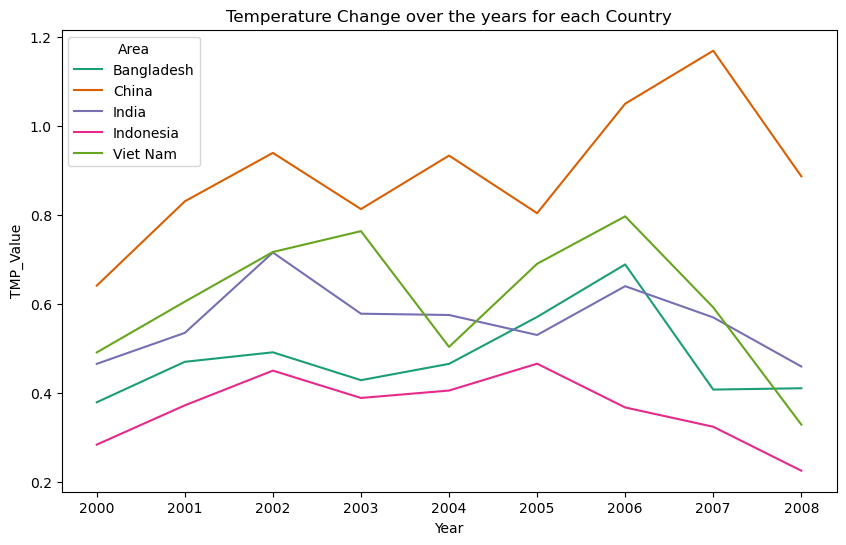

In [27]:
plt.figure(figsize=(10, 6))
sns.lineplot(data=Temperature_Change_On_Land_df, x='Year', y='TMP_Value', hue='Area',ci=None, palette='Dark2')
plt.xlabel('Year')
plt.ylabel('TMP_Value')
plt.title('Temperature Change over the years for each Country')
plt.legend(title='Area')
plt.show()

# 4. Land Use

In [28]:
Land_Use_df= pd.read_csv("Land_Use.csv")
Land_Use_df.drop([ 'Domain','Domain Code', 'Area Code (M49)', 'Element Code', 'Item Code', 'Year Code', 'Note'],  axis=1,inplace=True)
Land_Use_df.rename(columns={'Item': 'Area_type','Value':'Area Value', 'Element': 'Land_Use_Element', 'Unit': 'Land_Use_Unit', 'Flag': 'Land_Use_Flag', 'Flag Description': 'Land_Use_Flag_Description'}, inplace=True)
Land_Use_df = Land_Use_df[Land_Use_df['Year'].between(2000, 2008)]
Land_Use_df = Land_Use_df[Land_Use_df['Area_type'].isin(['Agricultural land','Cropland','Arable land'])]
# print(Land_Use_df['Area_type'].unique())
Land_Use_df.head()

,Area,Land_Use_Element,Area_type,Year,Land_Use_Unit,Area Value,Land_Use_Flag,Land_Use_Flag_Description
100,Bangladesh,Area,Agricultural land,2000,1000 ha,9400.0,I,Imputed value
101,Bangladesh,Area,Agricultural land,2001,1000 ha,9403.0,I,Imputed value
102,Bangladesh,Area,Agricultural land,2002,1000 ha,9353.0,I,Imputed value
103,Bangladesh,Area,Agricultural land,2003,1000 ha,9328.0,I,Imputed value
104,Bangladesh,Area,Agricultural land,2004,1000 ha,9323.0,I,Imputed value


In [29]:
print(Land_Use_df['Land_Use_Unit'].unique())

['1000 ha' '%']


In [30]:
# Filter rows where the unit is "1000 ha"
rows_to_convert = Land_Use_df['Land_Use_Unit'] == '1000 ha'

# Convert the unit to "ha" for these rows
Land_Use_df.loc[rows_to_convert, 'Land_Use_Unit'] = 'ha'

# Adjust the corresponding values in the 'Area Value' column
Land_Use_df.loc[rows_to_convert, 'Area Value'] *= 1000

# Display the DataFrame with updated units and values
Land_Use_df.head()

,Area,Land_Use_Element,Area_type,Year,Land_Use_Unit,Area Value,Land_Use_Flag,Land_Use_Flag_Description
100,Bangladesh,Area,Agricultural land,2000,ha,9400000.0,I,Imputed value
101,Bangladesh,Area,Agricultural land,2001,ha,9403000.0,I,Imputed value
102,Bangladesh,Area,Agricultural land,2002,ha,9353000.0,I,Imputed value
103,Bangladesh,Area,Agricultural land,2003,ha,9328000.0,I,Imputed value
104,Bangladesh,Area,Agricultural land,2004,ha,9323000.0,I,Imputed value


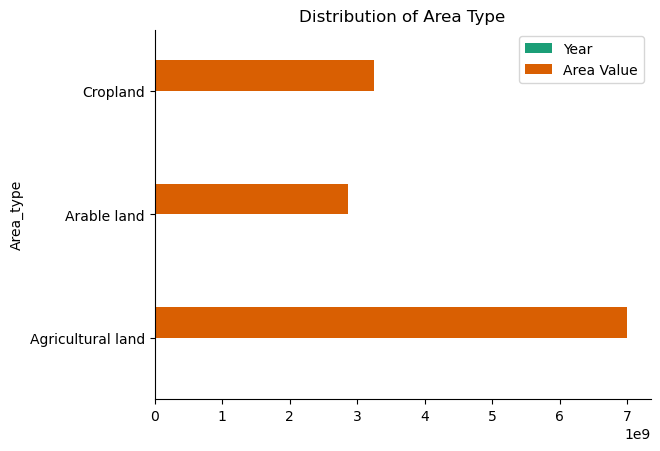

In [31]:
from matplotlib import pyplot as plt
import seaborn as sns
Land_Use_df.groupby('Area_type').sum().plot(kind='barh', color=sns.palettes.mpl_palette('Dark2'))
plt.title('Distribution of Area Type')
plt.gca().spines[['top', 'right',]].set_visible(False)

# 5. Emission Total

In [32]:
Emission_Total_df= pd.read_csv("Emission_Total.csv")
Emission_Total_df.drop(['Domain','Domain Code', 'Area Code (M49)', 'Element Code', 'Item Code (CPC)', 'Year Code',
       'Source Code', 'Source', 'Note'],  axis=1,inplace=True)
Emission_Total_df.rename(columns={'Element': 'Emissions','Value': "Emission_Value",'Item':'Crop_Name', 'Value': 'Emission_Total_Value',  'Unit': 'Emission_Total_Unit', 'Flag': 'Emission_Total_Flag', 'Flag Description': 'Emission_Total_Flag_Description'}, inplace=True)
Emission_Total_df = Emission_Total_df[Emission_Total_df['Year'].between(2000, 2008)]
Emission_Total_df= Emission_Total_df[Emission_Total_df['Emissions'].isin(['Crops total (Emissions N2O)' ,'Crop residues (N content)','Crops total (Emissions CH4)'])]
# print(Emission_Total_df['Emissions'].unique())
Emission_Total_df.head()

,Area,Emissions,Crop_Name,Year,Emission_Total_Unit,Emission_Total_Value,Emission_Total_Flag,Emission_Total_Flag_Description
195,Bangladesh,Crops total (Emissions N2O),Barley,2000,kt,0.0017,E,Estimated value
196,Bangladesh,Crop residues (N content),Barley,2000,kg,90695.0731,E,Estimated value
200,Bangladesh,Crops total (Emissions N2O),Barley,2001,kt,0.0014,E,Estimated value
201,Bangladesh,Crop residues (N content),Barley,2001,kg,73453.3647,E,Estimated value
205,Bangladesh,Crops total (Emissions N2O),Barley,2002,kt,0.0010,E,Estimated value


In [33]:
print(Emission_Total_df['Emission_Total_Unit'].unique())
print(Emission_Total_df['Emissions'].unique())


['kt' 'kg']
['Crops total (Emissions N2O)' 'Crop residues (N content)'
 'Crops total (Emissions CH4)']


In [34]:
# Define conversion factor from kilograms to kilotons
kilograms_to_kilotons = 1e-6  # Conversion factor from kilograms to kilotons
# Convert values in 'Emission_Total_Value' from kg to kt based on the unit in 'Emission_Total_Unit'
Emission_Total_df.loc[Emission_Total_df['Emission_Total_Unit'] == 'kg', 'Emission_Total_Value'] *= kilograms_to_kilotons

# Update the unit in 'Emission_Total_Unit' column to 'kt' for consistency
Emission_Total_df.loc[Emission_Total_df['Emission_Total_Unit'] == 'kg', 'Emission_Total_Unit'] = 'kt'

# Display the DataFrame with updated units and values
Emission_Total_df.head()

,Area,Emissions,Crop_Name,Year,Emission_Total_Unit,Emission_Total_Value,Emission_Total_Flag,Emission_Total_Flag_Description
195,Bangladesh,Crops total (Emissions N2O),Barley,2000,kt,0.001700,E,Estimated value
196,Bangladesh,Crop residues (N content),Barley,2000,kt,0.090695,E,Estimated value
200,Bangladesh,Crops total (Emissions N2O),Barley,2001,kt,0.001400,E,Estimated value
201,Bangladesh,Crop residues (N content),Barley,2001,kt,0.073453,E,Estimated value
205,Bangladesh,Crops total (Emissions N2O),Barley,2002,kt,0.001000,E,Estimated value


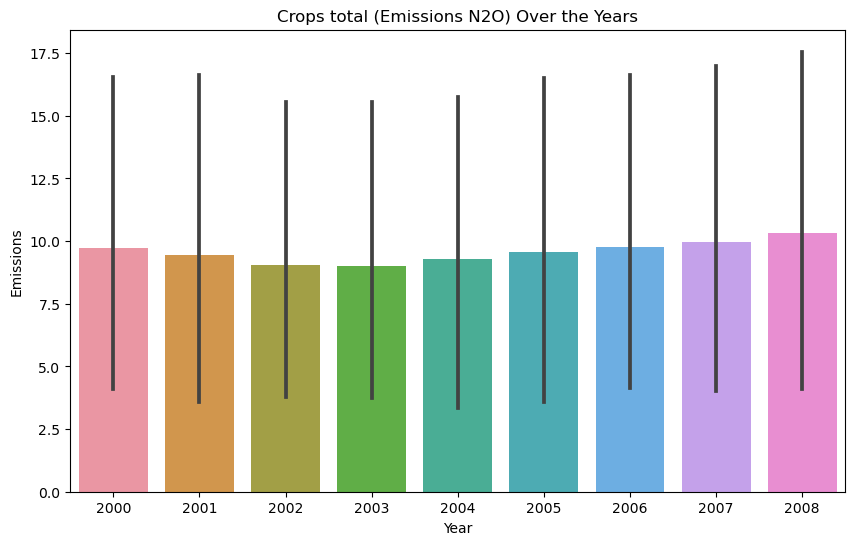

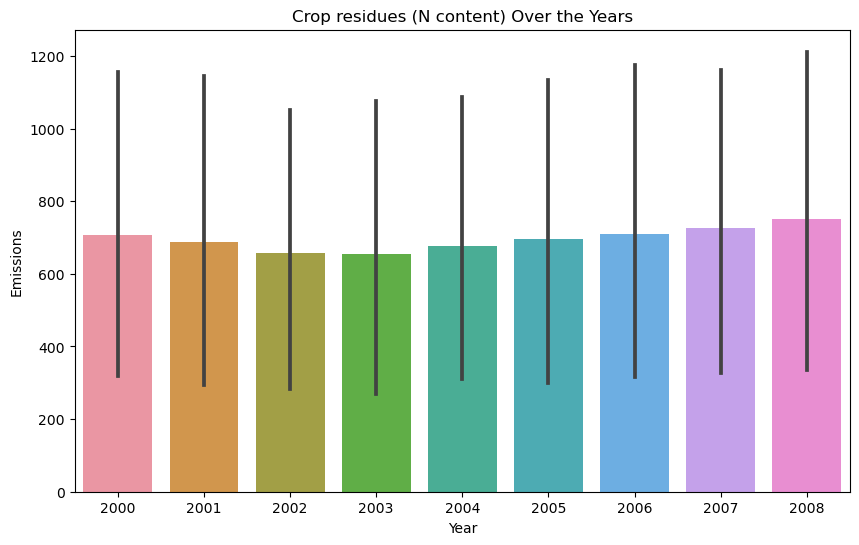

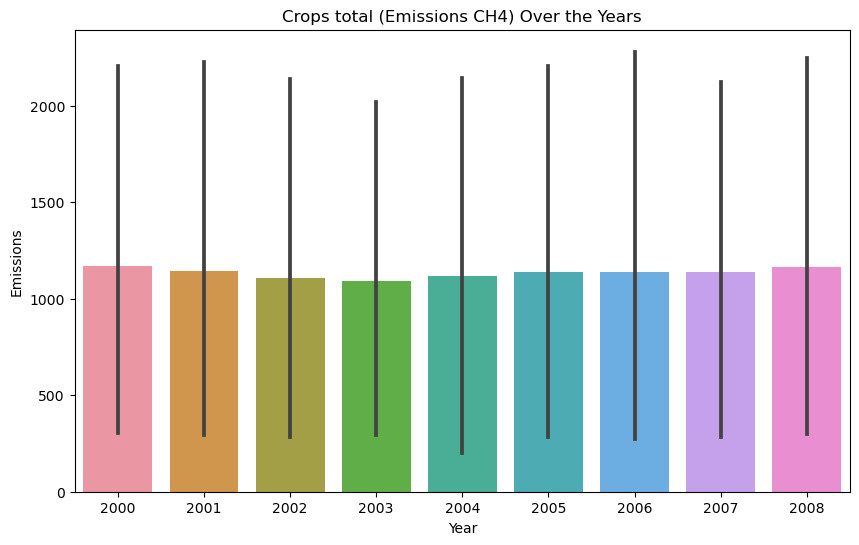

In [35]:
import matplotlib.pyplot as plt
import seaborn as sns

# Filter the DataFrame for each emission type
n2o_df = Emission_Total_df[Emission_Total_df['Emissions'] == 'Crops total (Emissions N2O)']
n_content_df = Emission_Total_df[Emission_Total_df['Emissions'] == 'Crop residues (N content)']
ch4_df = Emission_Total_df[Emission_Total_df['Emissions'] == 'Crops total (Emissions CH4)']

# Plot bar graphs for each emission type
plt.figure(figsize=(10, 6))
sns.barplot(data=n2o_df, x='Year', y='Emission_Total_Value')
plt.title('Crops total (Emissions N2O) Over the Years')
plt.xlabel('Year')
plt.ylabel('Emissions')
plt.show()

plt.figure(figsize=(10, 6))
sns.barplot(data=n_content_df, x='Year', y='Emission_Total_Value')
plt.title('Crop residues (N content) Over the Years')
plt.xlabel('Year')
plt.ylabel('Emissions')
plt.show()

plt.figure(figsize=(10, 6))
sns.barplot(data=ch4_df, x='Year', y='Emission_Total_Value')
plt.title('Crops total (Emissions CH4) Over the Years')
plt.xlabel('Year')
plt.ylabel('Emissions')
plt.show()


# 6. Value of Agricultural Production

In [36]:
Value_of_Agricultural_Production_df= pd.read_csv("Value_of_Agricultural_Production.csv")
Value_of_Agricultural_Production_df.drop(['Domain','Domain Code', 'Area Code (M49)', 'Element Code', 'Item Code (CPC)', 'Year Code'],  axis=1,inplace=True)
Value_of_Agricultural_Production_df.rename(columns={'Element': 'Production_Value_Type', 'Item': 'Crop_Name', 'Value': 'Production_Value_$', 'Unit': 'Prod_Output_Unit', 'Flag': 'Prod_Output_Flag', 'Flag Description': 'Prod_Output_Flag_Description'}, inplace=True)
Value_of_Agricultural_Production_df = Value_of_Agricultural_Production_df[Value_of_Agricultural_Production_df['Year'].between(2000, 2008)]
Value_of_Agricultural_Production_df= Value_of_Agricultural_Production_df[Value_of_Agricultural_Production_df['Production_Value_Type'].isin(['Gross Production Value (current thousand US$)'])]
# print(Value_of_Agricultural_Production_df['Production_Value_Type'].unique())
Value_of_Agricultural_Production_df.head()

,Area,Production_Value_Type,Crop_Name,Year,Prod_Output_Unit,Production_Value_$,Prod_Output_Flag,Prod_Output_Flag_Description
124,Bangladesh,Gross Production Value (current thousand US$),Barley,2006,1000 USD,154,E,Estimated value
125,Bangladesh,Gross Production Value (current thousand US$),Barley,2007,1000 USD,250,E,Estimated value
342,Bangladesh,Gross Production Value (current thousand US$),Rice,2000,1000 USD,4459731,E,Estimated value
343,Bangladesh,Gross Production Value (current thousand US$),Rice,2001,1000 USD,3918921,E,Estimated value
344,Bangladesh,Gross Production Value (current thousand US$),Rice,2002,1000 USD,4286101,E,Estimated value


In [37]:
print(Value_of_Agricultural_Production_df['Prod_Output_Unit'].unique())


['1000 USD']


In [38]:
# Define conversion factor from "1000 USD" to "USD"
usd_conversion_factor = 1000  # 1000 USD = 1 USD

# Convert values in 'Production_Value_$' from "1000 USD" to "USD" based on the unit in 'Prod_Output_Unit'
Value_of_Agricultural_Production_df.loc[Value_of_Agricultural_Production_df['Prod_Output_Unit'] == '1000 USD', 'Production_Value_$'] *= usd_conversion_factor

# Update the unit in 'Prod_Output_Unit' column to 'USD' for consistency
Value_of_Agricultural_Production_df.loc[Value_of_Agricultural_Production_df['Prod_Output_Unit'] == '1000 USD', 'Prod_Output_Unit'] = 'USD'

# Display the DataFrame with updated units and values
Value_of_Agricultural_Production_df.head()

,Area,Production_Value_Type,Crop_Name,Year,Prod_Output_Unit,Production_Value_$,Prod_Output_Flag,Prod_Output_Flag_Description
124,Bangladesh,Gross Production Value (current thousand US$),Barley,2006,USD,154000,E,Estimated value
125,Bangladesh,Gross Production Value (current thousand US$),Barley,2007,USD,250000,E,Estimated value
342,Bangladesh,Gross Production Value (current thousand US$),Rice,2000,USD,4459731000,E,Estimated value
343,Bangladesh,Gross Production Value (current thousand US$),Rice,2001,USD,3918921000,E,Estimated value
344,Bangladesh,Gross Production Value (current thousand US$),Rice,2002,USD,4286101000,E,Estimated value


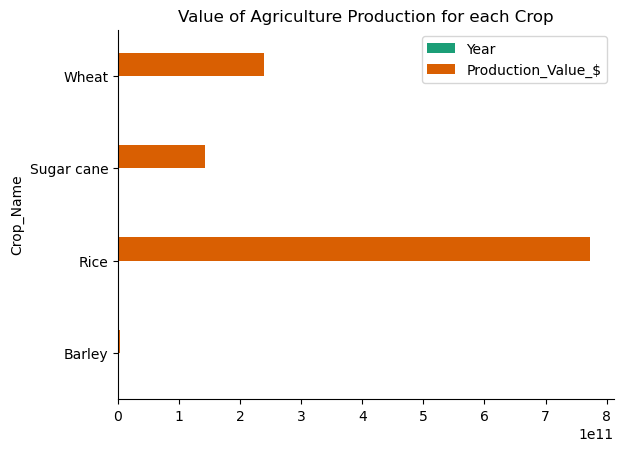

In [39]:
from matplotlib import pyplot as plt
import seaborn as sns
Value_of_Agricultural_Production_df.groupby('Crop_Name').sum().plot(kind='barh', color=sns.palettes.mpl_palette('Dark2'))
plt.title('Value of Agriculture Production for each Crop')
plt.gca().spines[['top', 'right',]].set_visible(False)

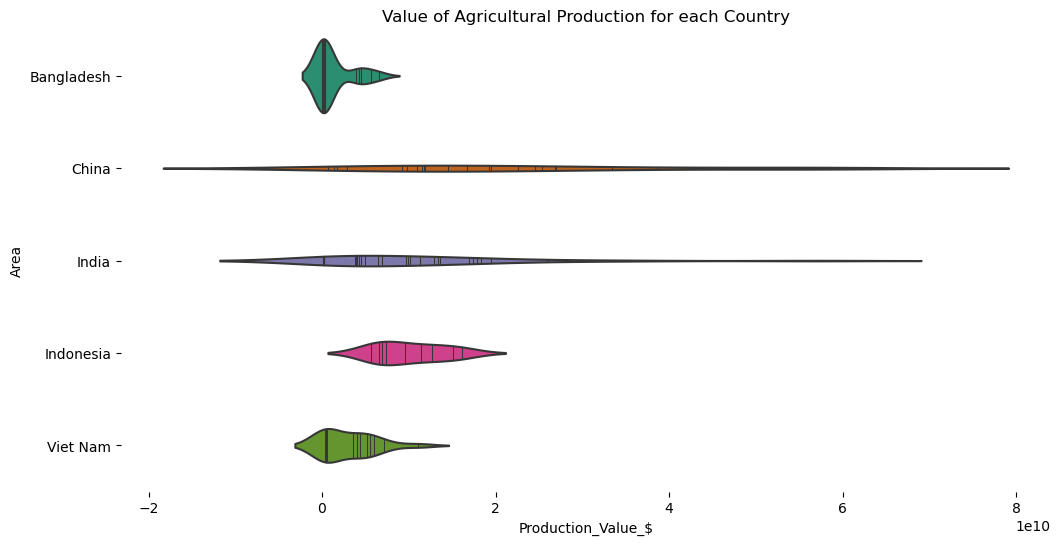

In [40]:
from matplotlib import pyplot as plt
import seaborn as sns
figsize = (12, 6)
plt.figure(figsize=figsize)
plt.title('Value of Agricultural Production for each Country')
sns.violinplot(Value_of_Agricultural_Production_df, x='Production_Value_$', y='Area', inner='stick', palette='Dark2')
sns.despine(top=True, right=True, bottom=True, left=True)

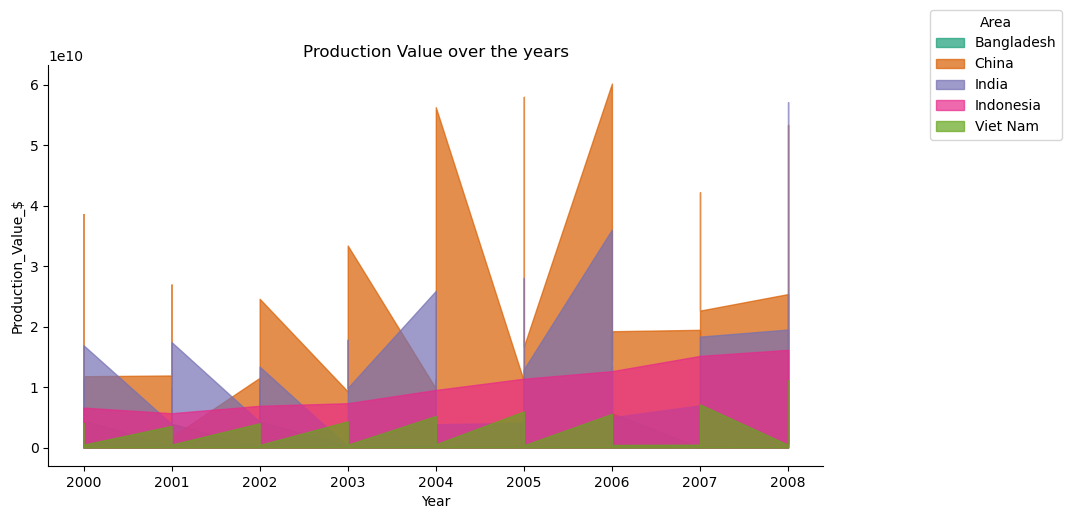

In [41]:
# Function to plot stacked area for each area
def _plot_series(series, series_name, series_index=0):
    palette = list(sns.palettes.mpl_palette('Dark2'))
    xs = series['Year']
    ys = series['Production_Value_$']

    plt.fill_between(xs, ys, label=series_name, color=palette[series_index % len(palette)], alpha=0.7)

# Create the figure and axis objects
fig, ax = plt.subplots(figsize=(10, 5.2))

# Sort the DataFrame by year
df_sorted = Value_of_Agricultural_Production_df.sort_values('Year', ascending=True)

# Iterate over each area and plot its stacked area
for i, (series_name, series) in enumerate(df_sorted.groupby('Area')):
    _plot_series(series, series_name, i)

# Add legend outside the plot
fig.legend(title='Area', bbox_to_anchor=(1, 1), loc='upper left')

# Customize labels and remove spines
plt.xlabel('Year')
plt.ylabel('Production_Value_$')
plt.title('Production Value over the years')
sns.despine(fig=fig, ax=ax)

plt.show()


In [42]:
merged_df = pd.merge(Crop_Production_df, Emission_Total_df, on=['Area', 'Year','Crop_Name'], how='inner')
merged_df = pd.merge(merged_df,Value_of_Agricultural_Production_df, on=['Area', 'Year','Crop_Name'], how='inner')
merged_df = pd.merge(merged_df,Crop_Land_Nutrient_Balance_df, on=['Area', 'Year'], how='inner')
merged_df = pd.merge(merged_df, Temperature_Change_On_Land_df, on=['Area', 'Year'], how='inner')
merged_df = pd.merge(merged_df,Land_Use_df, on=['Area', 'Year'], how='inner')

In [43]:
merged_df.head()

,Area,Prod_type,Crop_Name,Year,Crop_Production_Unit,Crop_Production_Value,Crop_Production_Flag,Crop_Production_Flag_Description,Emissions,Emission_Total_Unit,...,TMP_Unit,TMP_Value,TMP_Flag,TMP_Description,Land_Use_Element,Area_type,Land_Use_Unit,Area Value,Land_Use_Flag,Land_Use_Flag_Description
0,Bangladesh,Area harvested,Barley,2006,ha,969.0,A,Official figure,Crops total (Emissions N2O),kt,...,°c,0.7,E,Estimated value,Area,Agricultural land,ha,9280000.00,I,Imputed value
1,Bangladesh,Area harvested,Barley,2006,ha,969.0,A,Official figure,Crops total (Emissions N2O),kt,...,°c,0.7,E,Estimated value,Area,Cropland,ha,8680000.00,A,Official figure
2,Bangladesh,Area harvested,Barley,2006,ha,969.0,A,Official figure,Crops total (Emissions N2O),kt,...,°c,0.7,E,Estimated value,Share in Agricultural land,Cropland,%,93.53,E,Estimated value
3,Bangladesh,Area harvested,Barley,2006,ha,969.0,A,Official figure,Crops total (Emissions N2O),kt,...,°c,0.7,E,Estimated value,Area,Arable land,ha,7880000.00,I,Imputed value
4,Bangladesh,Area harvested,Barley,2006,ha,969.0,A,Official figure,Crops total (Emissions N2O),kt,...,°c,0.7,E,Estimated value,Share in Agricultural land,Arable land,%,84.91,E,Estimated value


In [44]:
# Check for null values in merged_df
null_values = merged_df.isnull().sum()

# Display the count of null values for each column
print(null_values)

Area                                0
Prod_type                           0
Crop_Name                           0
Year                                0
Crop_Production_Unit                0
Crop_Production_Value               0
Crop_Production_Flag                0
Crop_Production_Flag_Description    0
Emissions                           0
Emission_Total_Unit                 0
Emission_Total_Value                0
Emission_Total_Flag                 0
Emission_Total_Flag_Description     0
Production_Value_Type               0
Prod_Output_Unit                    0
Production_Value_$                  0
Prod_Output_Flag                    0
Prod_Output_Flag_Description        0
Nutrients                           0
Nutrients_type                      0
Nutrients_Unit                      0
Nutrients_Value                     0
Nutrients_Flag                      0
Nutrients_Flag_Description          0
Temp_Change                         0
Months                              0
TMP_Unit    

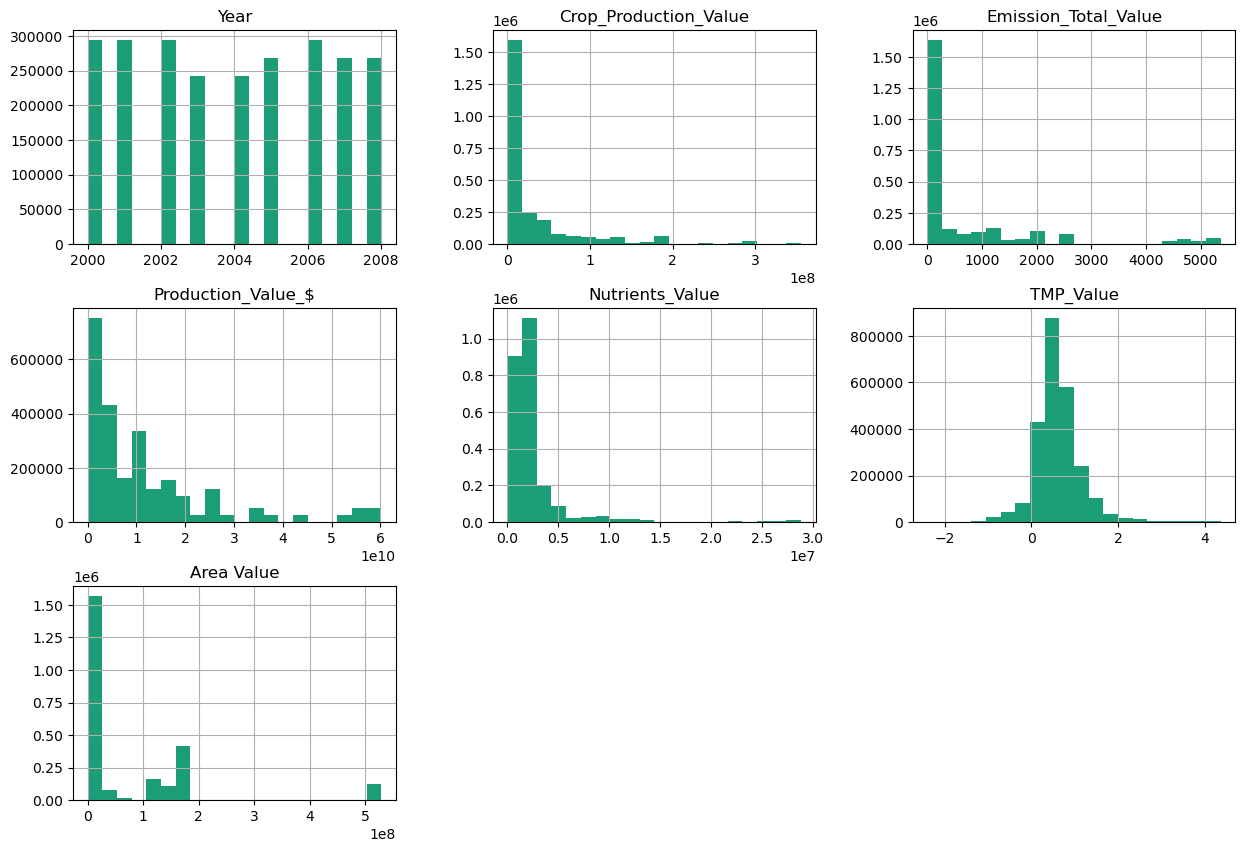

In [58]:
numerical_cols = ['Year', 'Crop_Production_Value', 'Emission_Total_Value', 'Production_Value_$',
                  'Nutrients_Value', 'TMP_Value', 'Area Value']
merged_df[numerical_cols].hist(bins=20, figsize=(15, 10))
plt.title('Distribution of all Columns')
plt.show()

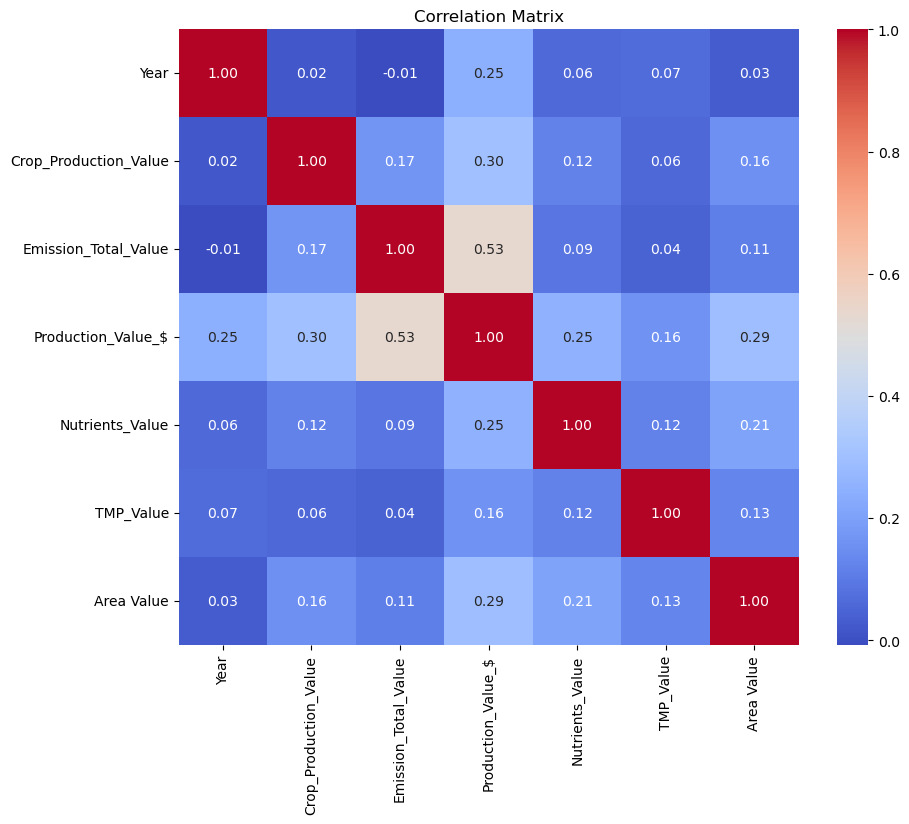

In [46]:
# Correlation matrix
correlation_matrix = merged_df[numerical_cols].corr()
plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f")
plt.title('Correlation Matrix')
plt.show()

## Linear Regression-Crop Yield Prediction

By using columns like Area, Prod_type, Crop_Name predict the Crop_Production_Value.

In [60]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import OneHotEncoder
from sklearn.compose import ColumnTransformer
from sklearn.metrics import mean_squared_error
from sklearn.metrics import r2_score

df = merged_df[['Area','Prod_type', 'Crop_Name','Crop_Production_Value']]
# df
X = df.drop(columns=['Crop_Production_Value'])  # Features
y = df['Crop_Production_Value']  # Target variable

#one-hot encoding
one_hot_columns = ['Area', 'Prod_type', 'Crop_Name']
transformer = ColumnTransformer(transformers=[('one_hot_encoder', OneHotEncoder(), one_hot_columns)], remainder='passthrough')

# Apply the transformer to the feature columns
X_transformed = transformer.fit_transform(X)

X_train, X_test, y_train, y_test = train_test_split(X_transformed, y, test_size=0.2, random_state=1234)
linear_regressor = LinearRegression()
linear_regressor.fit(X_train, y_train)
y_pred = linear_regressor.predict(X_test)
y_pred

array([-3.44389344e+07, -1.82287572e+07, -9.18273824e+06, ...,
       -7.58876190e+06,  1.08354567e+08,  3.24388552e+07])

In [61]:
# Model Evaluation
mse = mean_squared_error(y_test, y_pred)
r_squared = r2_score(y_test, y_pred)

print("Linear Regression-Crop Yield Prediction> Mean Square Error : ", mse)
print("Linear Regression-Crop Yield Prediction> Accuracy : ", r_squared)

# #coefficients and intercept
# print("Coefficients:")
# for feature, coef in zip(transformer.get_feature_names_out(), linear_regressor.coef_):
#     print(feature, ':', coef)    
# print("Intercept:", linear_regressor.intercept_)

Linear Regression-Crop Yield Prediction> Mean Square Error :  1513653315926814.8
Linear Regression-Crop Yield Prediction> Accuracy :  0.5454914616982647


## Random Forest Regression- Crop Yield Prediction

In [62]:
from sklearn.ensemble import RandomForestRegressor

rf_regressor = RandomForestRegressor(n_estimators=100, random_state=1234)
rf_regressor.fit(X_train, y_train)
y_pred = rf_regressor.predict(X_test)
y_pred

array([1.99244058e+00, 4.73406093e+00, 4.56606959e+00, ...,
       6.71114137e+05, 1.81693775e+08, 6.65944364e+01])

In [63]:
# Model Evaluation
mse = mean_squared_error(y_test, y_pred)
r_squared = r2_score(y_test, y_pred)

print("Random Forest Regression-Crop Yield Prediction> Mean Square Error : ", mse)
print("Random Forest Regression-Crop Yield Prediction> Accuracy : :", r_squared)

Random Forest Regression-Crop Yield Prediction> Mean Square Error :  46108840089637.25
Random Forest Regression-Crop Yield Prediction> Accuracy : : 0.9861547810906108


## Linear Regression - Temperature Change and Crop Yield

Understanding the impact of temperature change (TMP_Value) on crop yield production and predict crop yield based on seasonal temperature variations.

In [64]:
X = merged_df[['TMP_Value']]  # Temperature Change (Feature)
y = merged_df['Crop_Production_Value']  # Crop Yield (Target)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=1234)
linear_regressor = LinearRegression()
linear_regressor.fit(X_train, y_train)
y_pred = linear_regressor.predict(X_test)
y_pred

array([29081579.56433466, 28606118.87332933, 32495143.49975759, ...,
       30398239.93942637, 29758196.70153457, 30386048.639657  ])

In [65]:
# Model Evaluation
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print("Linear Regression-Temperature Change and Crop Yield> Mean Square Error : ", mse)
print("Linear Regression-Temperature Change and Crop Yield> Accuracy : ", r2)

Linear Regression-Temperature Change and Crop Yield> Mean Square Error :  3319079962780725.5
Linear Regression-Temperature Change and Crop Yield> Accuracy :  0.0033714018151140834


## Random Forest Regression - Temperature Change and Crop Yield

In [66]:
from sklearn.ensemble import RandomForestRegressor
rf_regressor = RandomForestRegressor(n_estimators=100, random_state=1234)
rf_regressor.fit(X_train, y_train)
y_pred = rf_regressor.predict(X_test)
y_pred

array([ 5094035.84287756, 11357105.92194417, 21806715.1996649 , ...,
       46399802.18854628, 46581732.93247816, 47984049.45162845])

In [67]:
# Model Evaluation
mse = mean_squared_error(y_test, y_pred)
r_squared = r2_score(y_test, y_pred)

print("Random Forest Regression-Temperature Change and Crop Yield> Mean Square Error : ", mse)
print("Random Forest Regression-Temperature Change and Crop Yield> Accuracy :", r_squared)

Random Forest Regression-Temperature Change and Crop Yield> Mean Square Error :  2989926031817822.0
Random Forest Regression-Temperature Change and Crop Yield> Accuracy : 0.1022072914234402
